# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2024
## deadline: 14.2.2024 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Aleksi Pikkarainen

Student number: 519153

Student email: akpikk@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=15 (15NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 15-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 15NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 15NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 15-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [1]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor

### Read in the datasets

In [2]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
inputs = pd.read_csv("input.csv", header=None)
outputs = pd.read_csv("output.csv", header=None)
coordinates = pd.read_csv("coordinates.csv", header=None)
print(inputs.shape, outputs.shape, coordinates.shape)

(1691, 75) (1691, 1) (1691, 2)


### Standardization of the predictor features (input.csv)

In [3]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 
inputs = inputs.apply(zscore)

### Functions and analysis code

In [4]:
# Include here all the functions and other relevant code that you need in order to implement the task.

# Note! Utilize the following two functions in your implementation:

### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.
def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5

    return h_num/n

    


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between 
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0]
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

### Results for spatial leave-one-out cross-validation with 15-nearest neighbor regression model

In [5]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 15-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

# Let's turn our pandas dataframes into numpy arrays
X = inputs.to_numpy()
y = outputs.to_numpy()
c = coordinates.to_numpy()

# Calculating the pairwise spatial distances
coords = cdists(c)

# Initializing our Leave-One-Out Cross-Validation
loocv = LeaveOneOut()

# Initializing our k-Nearest Neighbors model
knn = KNeighborsRegressor(n_neighbors=15)

# Creating an empty array to store our c-values
d_to_c = {}

# Iterating from 0 to 250 in increments of 10
for d in range(0,260,10):
    
    # Creating arrays to store actual and predicted values
    y_pred = []
    y_true = []
    
    # Performing the standard train-test split
    for train, test in loocv.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        
        # Taking the first 15 indexes, where the spatial distance values are 
        # larger than our d value.
        neighbors = np.where(coords[test, :] > d)[1][:15]
        
        # Fitting our model with those indexes.
        knn.fit(X_train[neighbors], y_train[neighbors])
        
        # Predicting using our model.
        pred_labels = knn.predict(X_test)
        
        #Adding our predictions and actual values to corresponding arrays.
        y_true.append(y_test)
        y_pred.append(pred_labels)
    
    
    # Adding our results to the empty array as a dictionary
    d_to_c.update({d : cindex(y_true, y_pred)})
    
# This takes ages so I put this here to know when I can continue    
print("done")
        
        


done


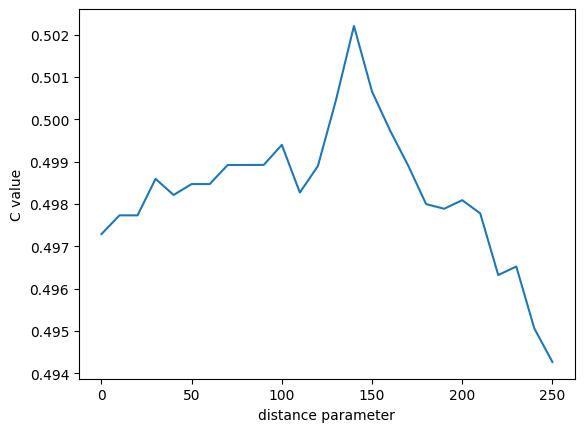

In [6]:
# Plotting our findings using the pyplot

plt.plot(d_to_c.keys(), d_to_c.values())
plt.xlabel("distance parameter")
plt.ylabel("C value")
plt.show()

### Interpretation of the results

In [7]:
# In this cell, give a brief commentary on the results, what happens to the prediction 
# performance as the prediction distance increases?

<p> The prediction performance increases with distance until a certain threshold, after which every increase of the distance results in diminishing returns. </p>